In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('finaldf.csv', index_col=None)
df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0       0.290990  0.110967  0.090525  0.119378     0.007841     0.006703   
1       0.632467  0.087944  0.067446  0.031406     0.056081     0.043030   
2       0.909080  0.091750  0.059734  0.044624     0.068019     0.013287   
3       0.363149  0.089687  0.062269  0.032871     0.006847     0.009072   
4       0.077721  0.098324  0.054710  0.028162     0.160764     0.001138   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...       aon  \
0     0.004863      0.054223      0.058669      0.023267  ...  0.150205   
1     0.003262      0.011320      0.008341      0.009743  ...  0.032601   
2     0.049685      0.049425      0.012339      0.034443  ...  0.586090   
3     0.006567      0.035431      0.023765      0.011620  ...  0.079932   
4     0.000724      0.007371      0.000000      0.000396  ...  0.117604   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  early_rech_6  early_rech_7  \
0    0.004470    0.002114    0.001678         0.0      0.485030      0.404192   
1    0.001628    0.099355    0.010940         0.0      0.491018      0.386228   
2    0.000000    0.000000    0.000000         0.0      0.505988      0.413174   
3    0.000000    0.000267    0.001960         0.0      0.476048      0.386228   
4    0.000000    0.000000    0.000000         0.0      0.476048      0.389222   

   early_rech_8  average_rech_6_7  churn  
0      0.311377          0.021835      1  
1      0.299401          0.004025      0  
2      0.299401          0.000308      0  
3      0.347305          0.002420      0  
4      0.314371          0.001056      0  

[5 rows x 95 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30011 entries, 0 to 30010
Data columns (total 95 columns):
mobile_number         30011 non-null float64
arpu_6                30011 non-null float64
arpu_7                30011 non-null float64
arpu_8                30011 non-null float64
onnet_mou_6           30011 non-null float64
onnet_mou_7           30011 non-null float64
onnet_mou_8           30011 non-null float64
offnet_mou_6          30011 non-null float64
offnet_mou_7          30011 non-null float64
offnet_mou_8          30011 non-null float64
roam_ic_mou_6         30011 non-null float64
roam_ic_mou_7         30011 non-null float64
roam_ic_mou_8         30011 non-null float64
roam_og_mou_6         30011 non-null float64
roam_og_mou_7         30011 non-null float64
roam_og_mou_8         30011 non-null float64
loc_og_t2c_mou_6      30011 non-null float64
loc_og_t2c_mou_7      30011 non-null float64
loc_og_t2c_mou_8      30011 non-null float64
loc_og_mou_6          30011 non-null

In [17]:
# plt.figure(figsize = (300, 250)) 
# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(df.drop(['churn'],axis=1), df['churn'])

print(X.shape)
print(y.shape)

Using TensorFlow backend.


(54836, 94)
(54836,)


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(y_train.shape)

(43868, 94)
(43868,)


In [34]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

PC1       PC2             Feature
0   0.048818 -0.920096       mobile_number
1  -0.000737  0.000424              arpu_6
2   0.000749 -0.000974              arpu_7
3   0.002624 -0.002867              arpu_8
4  -0.018315  0.014350         onnet_mou_6
5  -0.013631  0.009541         onnet_mou_7
6  -0.004454  0.001866         onnet_mou_8
7  -0.012227  0.002716        offnet_mou_6
8  -0.007917  0.000987        offnet_mou_7
9  -0.000364 -0.002566        offnet_mou_8
10 -0.001217 -0.002332       roam_ic_mou_6
11 -0.001070 -0.001858       roam_ic_mou_7
12 -0.000664 -0.001523       roam_ic_mou_8
13 -0.002619  0.000117       roam_og_mou_6
14 -0.003776 -0.002159       roam_og_mou_7
15 -0.001580 -0.000598       roam_og_mou_8
16 -0.000107  0.000571    loc_og_t2c_mou_6
17 -0.000227  0.000795    loc_og_t2c_mou_7
18 -0.000083 -0.000209    loc_og_t2c_mou_8
19  0.004446 -0.012618        loc_og_mou_6
20  0.006957 -0.016592        loc_og_mou_7
21  0.005289 -0.010595        loc_og_mou_8
22 -0.032449  0.030811        std_og_mou_6
23 -0.021026  0.020076        std_og_mou_7
24 -0.007361  0.007426        std_og_mou_8
25 -0.000178  0.000001        isd_og_mou_6
26  0.000009 -0.000122        isd_og_mou_7
27 -0.000070 -0.000021        isd_og_mou_8
28 -0.000487  0.001833        spl_og_mou_6
29 -0.000769  0.001726        spl_og_mou_7
..       ...       ...                 ...
64  0.002315 -0.007854  last_day_rch_amt_6
65  0.004982 -0.011254  last_day_rch_amt_7
66  0.005827 -0.008437  last_day_rch_amt_8
67  0.021342  0.003878         vol_2g_mb_6
68  0.028506  0.005027         vol_2g_mb_7
69  0.015091  0.002172         vol_2g_mb_8
70  0.006182  0.001168         vol_3g_mb_6
71  0.011625  0.000663         vol_3g_mb_7
72  0.009739 -0.000460         vol_3g_mb_8
73  0.602939  0.062697        monthly_2g_6
74  0.636203  0.033846        monthly_2g_7
75  0.467189  0.027783        monthly_2g_8
76  0.001910  0.002642         sachet_2g_6
77  0.000548  0.002628         sachet_2g_7
78  0.000890  0.000181         sachet_2g_8
79  0.000587 -0.001833        monthly_3g_6
80  0.000827 -0.002027        monthly_3g_7
81  0.002680 -0.003413        monthly_3g_8
82  0.000071  0.000909         sachet_3g_6
83 -0.000053  0.001437         sachet_3g_7
84  0.000098  0.000729         sachet_3g_8
85  0.061549 -0.377245                 aon
86  0.013053  0.000472          aug_vbc_3g
87  0.020003  0.001432          jul_vbc_3g
88  0.014177  0.002934          jun_vbc_3g
89  0.001820 -0.000316          sep_vbc_3g
90  0.000920 -0.002656        early_rech_6
91  0.000485 -0.001332        early_rech_7
92 -0.002762  0.003939        early_rech_8
93  0.000049 -0.000556    average_rech_6_7

[94 rows x 3 columns]

In [36]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [37]:
pcs_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   0.048818 -0.920096  0.017688 -0.150561  0.355335 -0.038665  0.008147   
1  -0.000737  0.000424  0.002821 -0.000441  0.003860  0.040656  0.013146   
2   0.000749 -0.000974 -0.003640 -0.001168  0.001698  0.033376  0.030924   
3   0.002624 -0.002867 -0.003498  0.006950 -0.003776  0.026059  0.043848   
4  -0.018315  0.014350  0.001571 -0.014309  0.057751  0.291922 -0.119032   
5  -0.013631  0.009541 -0.002938 -0.006619  0.043747  0.259450 -0.024701   
6  -0.004454  0.001866 -0.001911  0.002784  0.012843  0.127084  0.027081   
7  -0.012227  0.002716  0.001884 -0.011263  0.041014  0.227318  0.048606   
8  -0.007917  0.000987 -0.004781 -0.005369  0.028528  0.193158  0.110313   
9  -0.000364 -0.002566 -0.003910  0.005125  0.001208  0.078873  0.086858   
10 -0.001217 -0.002332  0.000256  0.001794 -0.007259 -0.019735 -0.011920   
11 -0.001070 -0.001858  0.000087  0.000765 -0.003074 -0.012127 -0.013478   
12 -0.000664 -0.001523 -0.000345  0.000585 -0.002253 -0.001509 -0.009720   
13 -0.002619  0.000117 -0.000048  0.001587 -0.004053 -0.012777 -0.026217   
14 -0.003776 -0.002159 -0.000307  0.000651 -0.001595 -0.010461 -0.043590   
15 -0.001580 -0.000598 -0.000833  0.000130 -0.000137  0.004209 -0.016066   
16 -0.000107  0.000571  0.001040 -0.000451  0.002498  0.009024  0.003300   
17 -0.000227  0.000795  0.000458 -0.001141  0.002133  0.009773  0.001894   
18 -0.000083 -0.000209 -0.000230  0.000769  0.002037  0.008377  0.007735   
19  0.004446 -0.012618  0.000119  0.011054 -0.020041  0.040632  0.144713   
20  0.006957 -0.016592 -0.003589  0.017939 -0.029911  0.062481  0.222121   
21  0.005289 -0.010595 -0.001970  0.015521 -0.022085  0.032097  0.133915   
22 -0.032449  0.030811  0.003170 -0.037877  0.117688  0.433774 -0.229257   
23 -0.021026  0.020076 -0.003683 -0.022238  0.079008  0.321438 -0.068054   
24 -0.007361  0.007426 -0.003426 -0.005045  0.028449  0.148800  0.006244   
25 -0.000178  0.000001 -0.000092  0.000038 -0.000435  0.000055  0.002895   
26  0.000009 -0.000122 -0.000605 -0.000433 -0.000080  0.000342  0.004049   
27 -0.000070 -0.000021 -0.000129 -0.000008 -0.000090  0.000854  0.003504   
28 -0.000487  0.001833  0.000008 -0.003663  0.005630  0.014564  0.004296   
29 -0.000769  0.001726 -0.000781 -0.002699  0.004694  0.018578  0.009504   
..       ...       ...       ...       ...       ...       ...       ...   
64  0.002315 -0.007854  0.003765  0.007935 -0.018278 -0.005782  0.023776   
65  0.004982 -0.011254 -0.004855  0.006300 -0.020049 -0.000590  0.041019   
66  0.005827 -0.008437 -0.003620  0.015052 -0.022794  0.001043  0.052025   
67  0.021342  0.003878  0.018361 -0.005736  0.003293 -0.008538  0.004365   
68  0.028506  0.005027 -0.013175 -0.013466  0.000011 -0.006586  0.003366   
69  0.015091  0.002172 -0.008708  0.013833  0.007296 -0.002825  0.004561   
70  0.006182  0.001168  0.004124  0.001496 -0.003094 -0.014468  0.015201   
71  0.011625  0.000663 -0.004408 -0.001066 -0.005398 -0.022022  0.030178   
72  0.009739 -0.000460 -0.003479  0.008458 -0.001733 -0.012884  0.028641   
73  0.602939  0.062697  0.788690 -0.087092  0.007497  0.032427 -0.006005   
74  0.636203  0.033846 -0.545886 -0.508746 -0.182790  0.042405 -0.020370   
75  0.467189  0.027783 -0.278396  0.762634  0.345084 -0.010398 -0.034947   
76  0.001910  0.002642 -0.006849 -0.001089  0.006829 -0.016035  0.029580   
77  0.000548  0.002628 -0.002778  0.003802  0.005917 -0.009061  0.032283   
78  0.000890  0.000181 -0.001584  0.001279 -0.001108 -0.002069  0.035975   
79  0.000587 -0.001833 -0.005703  0.004172 -0.011916 -0.039485  0.039663   
80  0.000827 -0.002027  0.002393  0.006598 -0.010287 -0.032260  0.043052   
81  0.002680 -0.003413  0.001631 -0.001502 -0.014070 -0.019014  0.041760   
82  0.000071  0.000909 -0.001160 -0.001005  0.002817 -0.009726  0.014016   
83 -0.000053  0.001437  0.000892 -0.000922  0.002475 -0.008467  0.014854   
84  0.000098  0.000729 -0.000132 -0.000580  0.000385 -0.0

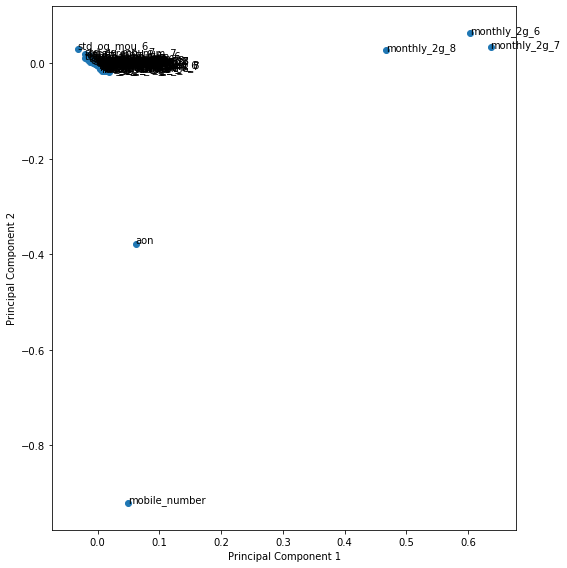

In [38]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [39]:
pca_train = pca.transform(x_train)
pca_train.shape

(43868, 94)

In [43]:
pca_test = pca.transform(x_test)
pca_test.shape

(10968, 94)

In [47]:
lgc = LogisticRegression()
lgc.fit(x_train, y_train)

y_pred_train = lgc.predict(x_train)
print(classification_report(y_train, y_pred_train))

y_pred_test = lgc.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     21926
           1       0.84      0.86      0.85     21942

    accuracy                           0.85     43868
   macro avg       0.85      0.85      0.85     43868
weighted avg       0.85      0.85      0.85     43868

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5492
           1       0.84      0.86      0.85      5476

    accuracy                           0.85     10968
   macro avg       0.85      0.85      0.85     10968
weighted avg       0.85      0.85      0.85     10968



D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
lgc = LogisticRegression()
lgc.fit(pca_train, y_train)

y_pred_train = lgc.predict(pca_train)
print(classification_report(y_train, y_pred_train))

y_pred_test = lgc.predict(pca_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     21926
           1       0.84      0.86      0.85     21942

    accuracy                           0.85     43868
   macro avg       0.85      0.85      0.85     43868
weighted avg       0.85      0.85      0.85     43868

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      5492
           1       0.84      0.86      0.85      5476

    accuracy                           0.85     10968
   macro avg       0.85      0.85      0.85     10968
weighted avg       0.85      0.85      0.85     10968



D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, class_weight='balanced_subsample')
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
print(classification_report(y_train, y_pred_train))

y_pred_test = rfc.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     21926
           1       0.95      0.96      0.96     21942

    accuracy                           0.96     43868
   macro avg       0.96      0.96      0.96     43868
weighted avg       0.96      0.96      0.96     43868

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5492
           1       0.94      0.94      0.94      5476

    accuracy                           0.94     10968
   macro avg       0.94      0.94      0.94     10968
weighted avg       0.94      0.94      0.94     10968



In [45]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, class_weight='balanced_subsample')
rfc.fit(pca_train, y_train)

y_pred_train = rfc.predict(pca_train)
print(classification_report(y_train, y_pred_train))

y_pred_test = rfc.predict(pca_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     21926
           1       0.92      0.92      0.92     21942

    accuracy                           0.92     43868
   macro avg       0.92      0.92      0.92     43868
weighted avg       0.92      0.92      0.92     43868

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5492
           1       0.90      0.89      0.89      5476

    accuracy                           0.89     10968
   macro avg       0.89      0.89      0.89     10968
weighted avg       0.89      0.89      0.89     10968

